# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

In [ ]:
Joris van Doorn, jorva845 || Weng Hang Wong, wenwo535

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation.

In [2]:
from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [3]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter)
filterResponseSobelX = signal.convolve2d(image, sobelX)
filterResponseSobelY = signal.convolve2d(image, sobelY)

In [4]:
# Show filter responses
import matplotlib.pyplot as plt
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response(Gauss)')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response(SobelX)')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response(SobelY)')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

**Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?**


Gaussian filter blurred the orginal image and reduce the noises of the image. 
SobelX filter keep the X directions on the imgae and emphasize the vertical lines.
SobelY filter did the opposite of the SobelX filter, which only keep the Y directions. 


**Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?**


The size of the original image is 512X512. It has one channel and normally a color image have 3 channels which are red, blue and green.


**Question 3: What is the size of the different filters?**


The Gassian filter has the size of 15X15. And both of the sobelX and sobelY filter have the size of 3X3.


**Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?**


The size of the 3 filter response are 512X512 if mode 'same' is used for the covolution.


**Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter?**


The size of the Gaussian filter response is 498X498 and the size of both sobelX and sobelY filter response are 510X510. The size of the valid filter response is depend on image.height-(filter.height-1). image.weight-(filter.height-1).


**Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?**


Since with many layers using 'valid' convolutions, the image will be smaller in every layer of the network and eventually run out of pixels.




In [5]:
# Your code for checking sizes of image and filter responses

# len(image.shape)
#So if len(img.shape) gives you two, it has a single channel.
#If len(img.shape) gives you three, third element gives you number of channels.

print("The image size is:",image.shape,"\n")


filterResponseGauss_s = signal.convolve2d(image, gaussFilter, mode='same')
filterResponseSobelX_s = signal.convolve2d(image, sobelX, mode='same')
filterResponseSobelY_s = signal.convolve2d(image, sobelY, mode='same')

filterResponseGauss_v = signal.convolve2d(image, gaussFilter, mode='valid')
filterResponseSobelX_v = signal.convolve2d(image, sobelX, mode='valid')
filterResponseSobelY_v = signal.convolve2d(image, sobelY, mode='valid')

print("")

print("Gaussian filter response shape:",filterResponseGauss.shape)
print("SobelX filter response shape:",filterResponseSobelX.shape)
print("SobelY filter response shape:",filterResponseSobelY.shape)
print("")
print("Size of Gassian filter response with mode='same':",filterResponseGauss_s.shape)
print("Size of SobelX filter response with mode='same':",filterResponseSobelX_s.shape)
print("Size of SobelY filter response with mode='same':",filterResponseSobelY_s.shape)
print("")
print("Size of Gaussian filter:",gaussFilter.shape)
print("size of sobelX and sobelY filter:",sobelX.shape)
print("")
print("Size of Gassian filter response with mode='valid':",filterResponseGauss_v.shape)
print("Size of SobelX filter response with mode='valid':",filterResponseSobelX_v.shape)
print("Size of SobelY filter response with mode='valid':",filterResponseSobelY_v.shape)\

The image size is: (512, 512) 


Gaussian filter response shape: (526, 526)
SobelX filter response shape: (514, 514)
SobelY filter response shape: (514, 514)

Size of Gassian filter response with mode='same': (512, 512)
Size of SobelX filter response with mode='same': (512, 512)
Size of SobelY filter response with mode='same': (512, 512)

Size of Gaussian filter: (15, 15)
size of sobelX and sobelY filter: (3, 3)

Size of Gassian filter response with mode='valid': (498, 498)
Size of SobelX filter response with mode='valid': (510, 510)
Size of SobelY filter response with mode='valid': (510, 510)


##  Part 3: Get a graphics card

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [6]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

##  Part 4: How fast is the graphics card?
Lets investigate how much faster a convolution is with the graphics card

**Question 7: Why are the filters of size 7 x 7 x 3, and not 7 x 7 ?**


This is because the filter might be of size 7x7, but it has 3 input channels.

**Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?**


The Conv2D layer almost performs a 3D convolution over the image. Basically the filter is learning the best way to combine the input tensor.

**Question 9: How much faster is the graphics card, compared to the CPU, for convolving a batch of 100 images?**


CPU (s):
0.9834704240001884


GPU (s):
0.198528892000013


GPU speedup over CPU: 4x

The GPU is 4 times speedup than the CPU.

**Question 10: How much faster is the graphics card, compared to the CPU, for convolving a batch of 2 images? Explain the difference compared to 100 images.**

CPU (s):
0.07813259599993216


GPU (s):
0.05785561900006542


GPU speedup over CPU: 1x

The GPU is 1 time faster than the CPU. The speedup is more obvious and effcient with a larger number of images per batch, since it is a compound speedup adding up the whole amount of the processing time



In [7]:
# Run this cell to compare processing time of CPU and GPU

import timeit

n_images_in_batch = 100

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

# Perform convolutions using the CPU
def cpu():
  with tf.device('/cpu:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_cpu)

# Perform convolutions using the GPU (graphics card)
def gpu():
  with tf.device('/device:GPU:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the convolution several times and measure the time
print('Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3'
      ' (batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3 (batch x height x width x channel). Sum of ten runs.
CPU (s):
1.00055227200005
GPU (s):
0.19987393699989298
GPU speedup over CPU: 5x


##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [8]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

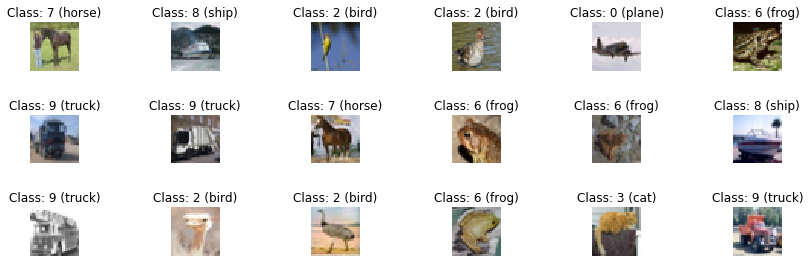

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
from sklearn.model_selection import train_test_split


Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25)

# Print the size of training data, validation data and test data

print('The training data have size {} and {}'.format(Xtrain.shape, Ytrain.shape))
print('The validation data have size {} and {}'.format(Xval.shape, Yval.shape))
print('The test data have size {} and {}'.format(Xtest.shape, Ytest.shape))


The training data have size (7500, 32, 32, 3) and (7500, 1)
The validation data have size (2500, 32, 32, 3) and (2500, 1)
The test data have size (2000, 32, 32, 3) and (2000, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [11]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/utils/#to_categorical

In [12]:
from keras.utils import to_categorical

# Print shapes before converting the labels
print("Training ladel size:",Ytrain.shape)
print("Validation label size:", Yval.shape)
print("Test label size:", Ytest.shape)

# Your code for converting Ytrain, Yval, Ytest to categorical
converted_Ytrain = to_categorical(Ytrain, num_classes=10, dtype="float32")
converted_Yval = to_categorical(Yval, num_classes=10, dtype="float32")
converted_Ytest = to_categorical(Ytest, num_classes=10, dtype="float32")

# Print shapes after converting the labels
print("Converted training labels size:",converted_Ytrain.shape)
print("Converted validation labels size:",converted_Yval.shape)
print("Converted test labels size:", converted_Ytest.shape)



Training ladel size: (7500, 1)
Validation label size: (2500, 1)
Test label size: (2000, 1)
Converted training labels size: (7500, 10)
Converted validation labels size: (2500, 10)
Converted test labels size: (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [28]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy as BC

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup optimizer, depending on input parameter string
    
    optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    
    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters=n_filters, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    if(use_dropout==True):
            model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        model.add(Conv2D(filters=n_filters*2, kernel_size=(3,3), padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        

    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation='relu'))
        model.add(BatchNormalization())
        if(use_dropout==True):
            model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
        
    # Add final dense layer
    model.add(Dense(10, activation='softmax'))
    

    # Compile model
    model.compile(loss=BC, optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [30]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

## 2 convolutional layers, no intermediate dense layers

In [31]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, 
                   use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, 
                      converted_Ytrain, 
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,converted_Yval))



Train on 7500 samples, validate on 2500 samples
Epoch 1/20
 - 2s - loss: 2.9021 - accuracy: 0.3123 - val_loss: 1.9328 - val_accuracy: 0.3428
Epoch 2/20
 - 1s - loss: 1.5980 - accuracy: 0.4552 - val_loss: 1.7173 - val_accuracy: 0.3812
Epoch 3/20
 - 1s - loss: 1.2958 - accuracy: 0.5439 - val_loss: 1.6084 - val_accuracy: 0.4236
Epoch 4/20
 - 1s - loss: 1.1642 - accuracy: 0.5851 - val_loss: 1.5544 - val_accuracy: 0.4584
Epoch 5/20
 - 1s - loss: 1.0722 - accuracy: 0.6168 - val_loss: 1.4120 - val_accuracy: 0.5088
Epoch 6/20
 - 1s - loss: 0.9871 - accuracy: 0.6515 - val_loss: 1.5284 - val_accuracy: 0.4892
Epoch 7/20
 - 1s - loss: 0.8899 - accuracy: 0.6888 - val_loss: 1.4041 - val_accuracy: 0.5348
Epoch 8/20
 - 1s - loss: 0.8138 - accuracy: 0.7161 - val_loss: 1.3979 - val_accuracy: 0.5412
Epoch 9/20
 - 1s - loss: 0.7439 - accuracy: 0.7443 - val_loss: 1.5552 - val_accuracy: 0.5216
Epoch 10/20
 - 1s - loss: 0.6708 - accuracy: 0.7627 - val_loss: 1.5561 - val_accuracy: 0.5564
Epoch 11/20
 - 1s - l

In [32]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest,converted_Ytest,batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 89us/step
Test loss: 2.9251
Test accuracy: 0.5420


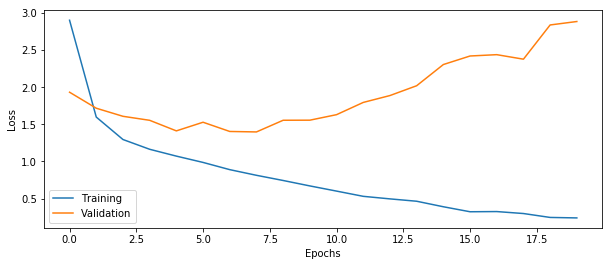

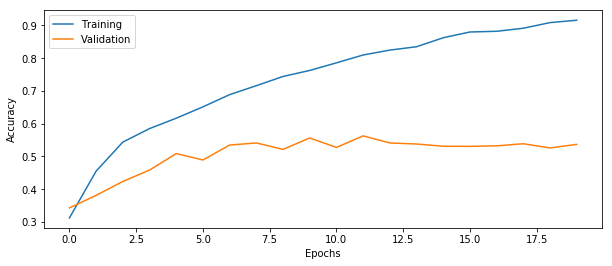

In [33]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance
**Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ?**


Test loss: 0.3875
Test accuracy: 0.8745

**Question 11: How big is the difference between training and test accuracy?**


According to the plot abobve, it is very obvious that the training accuracy is much higher than the test acurracy, which has 1-10% higher.

**Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'watch nvidia-smi' on the cloud computer during training.**

We got errors on runing this code,"Failed to initialize NVML: Driver/library version mismatch"



**Question 13: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?**


We need a smaller batch size of this laboration since each batch contains a larger dimensions data than the DNN laboration. So we have to use a smaller batch size in this laboration to increase the efficiency.



## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [34]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes=50, 
                   use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain, 
                      converted_Ytrain, 
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,converted_Yval))
 

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
 - 2s - loss: 1.6795 - accuracy: 0.4129 - val_loss: 1.7505 - val_accuracy: 0.3696
Epoch 2/20
 - 1s - loss: 1.2668 - accuracy: 0.5416 - val_loss: 1.9552 - val_accuracy: 0.3368
Epoch 3/20
 - 1s - loss: 1.0922 - accuracy: 0.6120 - val_loss: 1.7753 - val_accuracy: 0.4016
Epoch 4/20
 - 1s - loss: 0.9340 - accuracy: 0.6605 - val_loss: 1.3954 - val_accuracy: 0.5160
Epoch 5/20
 - 1s - loss: 0.7727 - accuracy: 0.7332 - val_loss: 1.4411 - val_accuracy: 0.5396
Epoch 6/20
 - 1s - loss: 0.6144 - accuracy: 0.7871 - val_loss: 1.5082 - val_accuracy: 0.5620
Epoch 7/20
 - 1s - loss: 0.5085 - accuracy: 0.8249 - val_loss: 1.5829 - val_accuracy: 0.5544
Epoch 8/20
 - 1s - loss: 0.3528 - accuracy: 0.8780 - val_loss: 1.7838 - val_accuracy: 0.5540
Epoch 9/20
 - 1s - loss: 0.2600 - accuracy: 0.9121 - val_loss: 1.9502 - val_accuracy: 0.5416
Epoch 10/20
 - 1s - loss: 0.2114 - accuracy: 0.9287 - val_loss: 2.2720 - val_accuracy: 0.5276
Epoch 11/20
 - 1s - l

In [35]:
# Evaluate the trained model on test set, not used in training or validation
score =  model2.evaluate(Xtest,converted_Ytest,batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 54us/step
Test loss: 2.7201
Test accuracy: 0.5730


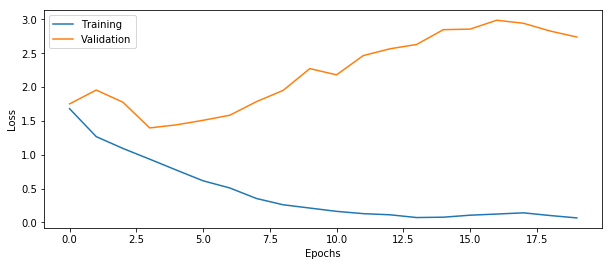

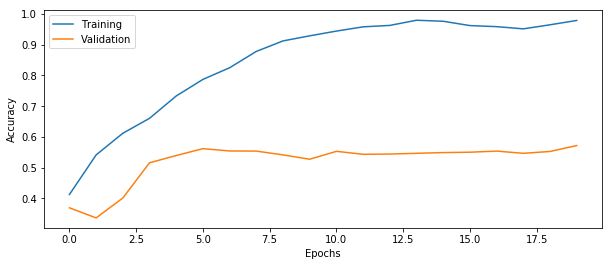

In [36]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [37]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, 
                   use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain, 
                      converted_Ytrain, 
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,converted_Yval))
 

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
 - 3s - loss: 1.8496 - accuracy: 0.3360 - val_loss: 1.9924 - val_accuracy: 0.3316
Epoch 2/20
 - 1s - loss: 1.4699 - accuracy: 0.4525 - val_loss: 1.7522 - val_accuracy: 0.3796
Epoch 3/20
 - 1s - loss: 1.2987 - accuracy: 0.5145 - val_loss: 1.6411 - val_accuracy: 0.4476
Epoch 4/20
 - 1s - loss: 1.1708 - accuracy: 0.5761 - val_loss: 1.4544 - val_accuracy: 0.4900
Epoch 5/20
 - 1s - loss: 1.0573 - accuracy: 0.6180 - val_loss: 1.5559 - val_accuracy: 0.5240
Epoch 6/20
 - 1s - loss: 0.9485 - accuracy: 0.6575 - val_loss: 1.4458 - val_accuracy: 0.5668
Epoch 7/20
 - 1s - loss: 0.8551 - accuracy: 0.6937 - val_loss: 1.6315 - val_accuracy: 0.5396
Epoch 8/20
 - 1s - loss: 0.7709 - accuracy: 0.7259 - val_loss: 1.7131 - val_accuracy: 0.5088
Epoch 9/20
 - 1s - loss: 0.6902 - accuracy: 0.7532 - val_loss: 2.5942 - val_accuracy: 0.4304
Epoch 10/20
 - 1s - loss: 0.6154 - accuracy: 0.7785 - val_loss: 1.7766 - val_accuracy: 0.5644
Epoch 11/20
 - 1s - l

In [38]:
# Evaluate the trained model on test set, not used in training or validation
score =  model3.evaluate(Xtest,converted_Ytest,batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 59us/step
Test loss: 2.2780
Test accuracy: 0.5700


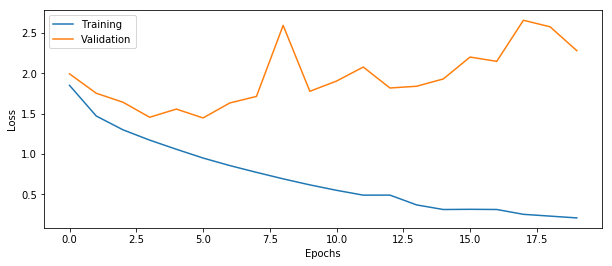

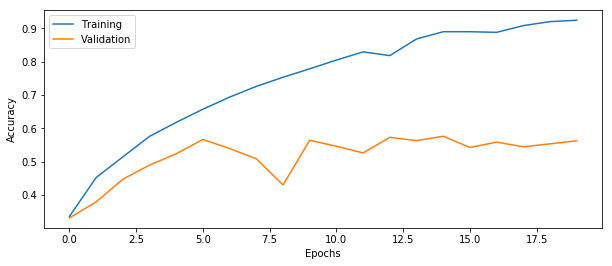

In [39]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

**Question 14: How many trainable parameters does your network have? Which part of the network contains most of the parameters?**


There are 30,868 trainable parameter in model3 network. The conv2d_25 and conv2d_26 contains most of the parameters which are 9248 of each. 


**Question 15: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output?**


The input to the Conv2Dfilters is a 4D tensor and returns another 4D tensor. The dimensions of input and output are: batch_size, height, width, channels.


**Question 16: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/**


Yes, the batch_size is always the first dimension of each 4D tensor. 


**Question 17: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?**


No matter how many input channels we have in a layer, the number of output channels are equal to the number of input filters, which is 128.


**Question 18: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?**

This is because Conv2D almost performs a 3D convolution to combine all input channels, so it needs to learn a weight per filter per channel.

**Question 19: How does MaxPooling help in reducing the number of parameters to train?**


It helps the filly connected layer become much smaller by reducing the number of parameters, so that to make the training process more efficient.

In [40]:
# Print network architecture

model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_22 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 32)         

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

**Question 20: How much did the test accuracy improve with dropout, compared to without dropout?**


With dropout Test accuracy: 0.8910; Without dropout Test accuracy: 0.8583


So the test accuracy improved 4% with using dropout


**Question 21: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?**


There are L1 norm(Lasso) and L2 norm(Ridge regression) and L1+L2 norm(elastic net) regulariztions. We can add the L2 regulariztion on the Dense layer with an input of kernel_regualrizer), 

eg.) model.add(Dense(62, kernel_regularizer=l2(0.01),bias_regularizer=l2(0.02)))


## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [41]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, 
                   use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain, 
                      converted_Ytrain, 
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,converted_Yval))
 

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
 - 3s - loss: 2.1245 - accuracy: 0.2627 - val_loss: 3.4936 - val_accuracy: 0.1092
Epoch 2/20
 - 1s - loss: 1.6961 - accuracy: 0.3733 - val_loss: 3.4617 - val_accuracy: 0.1368
Epoch 3/20
 - 1s - loss: 1.5807 - accuracy: 0.4107 - val_loss: 2.4330 - val_accuracy: 0.2272
Epoch 4/20
 - 1s - loss: 1.5100 - accuracy: 0.4481 - val_loss: 1.7048 - val_accuracy: 0.3824
Epoch 5/20
 - 1s - loss: 1.4431 - accuracy: 0.4692 - val_loss: 1.6178 - val_accuracy: 0.4152
Epoch 6/20
 - 1s - loss: 1.3770 - accuracy: 0.4944 - val_loss: 1.4029 - val_accuracy: 0.4896
Epoch 7/20
 - 1s - loss: 1.3444 - accuracy: 0.5089 - val_loss: 1.3174 - val_accuracy: 0.5328
Epoch 8/20
 - 1s - loss: 1.2849 - accuracy: 0.5388 - val_loss: 1.3261 - val_accuracy: 0.5264
Epoch 9/20
 - 1s - loss: 1.2353 - accuracy: 0.5531 - val_loss: 1.3716 - val_accuracy: 0.5288
Epoch 10/20
 - 1s - loss: 1.1923 - accuracy: 0.5699 - val_loss: 1.3325 - val_accuracy: 0.5284
Epoch 11/20
 - 1s - l

In [42]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest,converted_Ytest,batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 72us/step
Test loss: 1.1951
Test accuracy: 0.6035


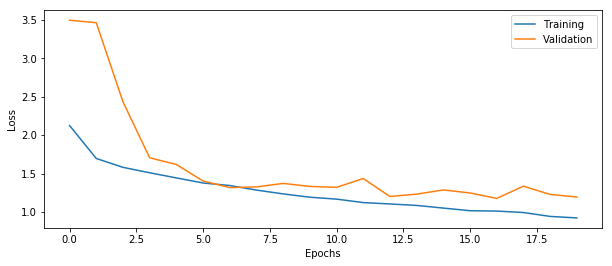

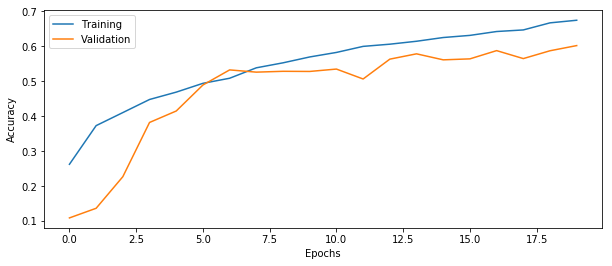

In [43]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

**Question 22: How high test accuracy can you obtain? What is your best configuration?**

The Test accuracy that we can obtain is 0.6035. The best configuration is below on model5.


## Your best config

In [44]:
# Setup some training parameters
batch_size = 200
epochs = 20 
input_shape = Xtrain.shape[1:4]

"""
                   
0.8990 batc_size=100, epoch=20 n_conv_layers=4, n_filters=16, n_dense_layers=5, n_nodes=50, 
                   use_dropout=True, learning_rate=0.01) 
                   
0.8604 batc_size=150, epoch=30 n_conv_layers=4, n_filters=16, n_dense_layers=10, n_nodes=50, 
                   use_dropout=FALSE, learning_rate=0.01                   
                   
0.8992 batc_size=150, epoch=20, n_conv_layers=4, n_filters=16, n_dense_layers=10, n_nodes=50, 
                   use_dropout=True, learning_rate=0.01
                   
0.8973 batc_size=200, epoch=20 n_conv_layers=4, n_filters=16, n_dense_layers=2, n_nodes=50, 
                   use_dropout=True, learning_rate=0.01 
                   
0.8999 batc_size=200, epoch=20 n_conv_layers=4, n_filters=8, n_dense_layers=2, n_nodes=50, 
                   use_dropout=True, learning_rate=0.01                 

0.8492 batc_size=200 epoch=20 n_conv_layers=4, n_filters=8, n_dense_layers=2, n_nodes=50, 
                   use_dropout=True, learning_rate=0.05
                   
0.9000 batc_size=200 epoch=20 n_conv_layers=4, n_filters=8, n_dense_layers=1, n_nodes=50, 
                   use_dropout=True, learning_rate=0.01
"""
# Build model
model5 = build_CNN(input_shape, n_conv_layers=4, n_filters=8, n_dense_layers=1, n_nodes=50, 
                   use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain, 
                      converted_Ytrain, 
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,converted_Yval))
 

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
 - 3s - loss: 2.2483 - accuracy: 0.2335 - val_loss: 2.6038 - val_accuracy: 0.1768
Epoch 2/20
 - 1s - loss: 1.7977 - accuracy: 0.3344 - val_loss: 1.7261 - val_accuracy: 0.3572
Epoch 3/20
 - 1s - loss: 1.6947 - accuracy: 0.3656 - val_loss: 1.7228 - val_accuracy: 0.3424
Epoch 4/20
 - 1s - loss: 1.6475 - accuracy: 0.4000 - val_loss: 1.7136 - val_accuracy: 0.3436
Epoch 5/20
 - 1s - loss: 1.5945 - accuracy: 0.4112 - val_loss: 1.7287 - val_accuracy: 0.3596
Epoch 6/20
 - 1s - loss: 1.5641 - accuracy: 0.4223 - val_loss: 1.6354 - val_accuracy: 0.4060
Epoch 7/20
 - 1s - loss: 1.5185 - accuracy: 0.4445 - val_loss: 1.5877 - val_accuracy: 0.4368
Epoch 8/20
 - 1s - loss: 1.4866 - accuracy: 0.4551 - val_loss: 1.5885 - val_accuracy: 0.4384
Epoch 9/20
 - 1s - loss: 1.4483 - accuracy: 0.4731 - val_loss: 1.3825 - val_accuracy: 0.4872
Epoch 10/20
 - 1s - loss: 1.4239 - accuracy: 0.4832 - val_loss: 1.3924 - val_accuracy: 0.5028
Epoch 11/20
 - 1s - l

In [45]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest,converted_Ytest,batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 40us/step
Test loss: 1.3426
Test accuracy: 0.5175


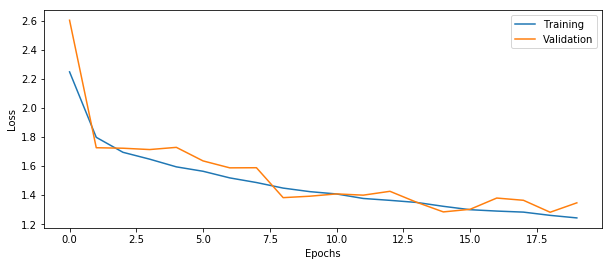

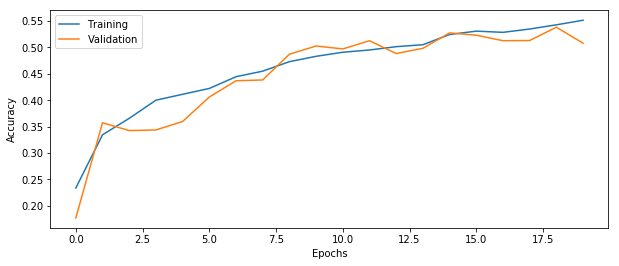

In [46]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

**How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?**

Rotate each test image 90 degrees, the cells are already finished.

**Question 23: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.**


The Test accuracy of rotated images is 0.1900, which is worse than without the rotated data.

In [47]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

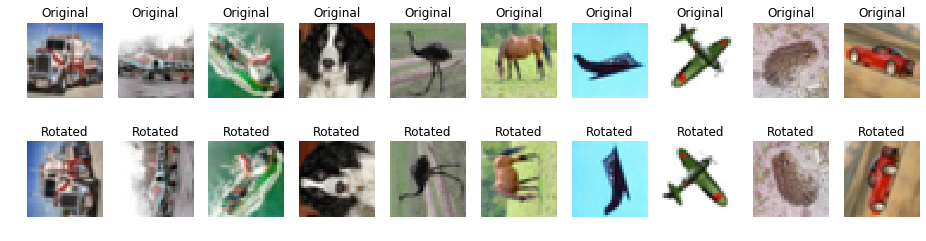

In [48]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [49]:
# Evaluate the trained model on rotated test set
score =  model5.evaluate(Xtest_rotated,converted_Ytest,batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 50us/step
Test loss: 2.9455
Test accuracy: 0.1900


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://keras.io/preprocessing/image/

In [50]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [60]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)


# Setup a flow for training data, assume that we can fit all images into CPU memory
train_flow = datagen.flow(Xtrain, Ytrain, batch_size=batch_size, subset='training')

# Setup a flow for validation data, assume that we can fit all images into CPU memory

val_flow = datagen.flow(Xtrain, Ytrain, batch_size=batch_size, subset='validation')

# Train the model  using on the fly augmentation

history55 = model5.fit_generator(train_flow, epochs=epochs, steps_per_epoch=len(Xtrain)*(1 - 0.25)/batch_size, validation_data=val_flow, validation_steps=len(Xtrain)*0.25/batch_size, use_multiprocessing=True)


Epoch 1/200
75/75 [==============================] - 4s 52ms/step - loss: 1.6821 - accuracy: 0.3903 - val_loss: 1.4613 - val_accuracy: 0.3940
Epoch 2/200
75/75 [==============================] - 4s 51ms/step - loss: 1.6627 - accuracy: 0.3947 - val_loss: 1.6713 - val_accuracy: 0.3768
Epoch 3/200
75/75 [==============================] - 4s 52ms/step - loss: 1.6621 - accuracy: 0.3988 - val_loss: 1.6362 - val_accuracy: 0.3772
Epoch 4/200
75/75 [==============================] - 4s 50ms/step - loss: 1.6548 - accuracy: 0.4072 - val_loss: 1.8838 - val_accuracy: 0.3868
Epoch 5/200
75/75 [==============================] - 4s 49ms/step - loss: 1.6524 - accuracy: 0.4009 - val_loss: 1.6972 - val_accuracy: 0.3656
Epoch 6/200
75/75 [==============================] - 4s 47ms/step - loss: 1.6523 - accuracy: 0.4008 - val_loss: 1.8784 - val_accuracy: 0.3532
Epoch 7/200
75/75 [==============================] - 4s 48ms/step - loss: 1.6385 - accuracy: 0.4064 - val_loss: 1.4420 - val_accuracy: 0.3976
Epoch 

75/75 [==============================] - 4s 47ms/step - loss: 1.5507 - accuracy: 0.4355 - val_loss: 1.8001 - val_accuracy: 0.4468
Epoch 59/200
75/75 [==============================] - 4s 48ms/step - loss: 1.5324 - accuracy: 0.4497 - val_loss: 2.1684 - val_accuracy: 0.3288
Epoch 60/200
75/75 [==============================] - 4s 50ms/step - loss: 1.5599 - accuracy: 0.4380 - val_loss: 1.9439 - val_accuracy: 0.3884
Epoch 61/200
75/75 [==============================] - 3s 46ms/step - loss: 1.5438 - accuracy: 0.4407 - val_loss: 1.8486 - val_accuracy: 0.3688
Epoch 62/200
75/75 [==============================] - 4s 47ms/step - loss: 1.5379 - accuracy: 0.4452 - val_loss: 1.5806 - val_accuracy: 0.3860
Epoch 63/200
75/75 [==============================] - 4s 48ms/step - loss: 1.5333 - accuracy: 0.4457 - val_loss: 1.7780 - val_accuracy: 0.3772
Epoch 64/200
75/75 [==============================] - 4s 48ms/step - loss: 1.5267 - accuracy: 0.4520 - val_loss: 1.8942 - val_accuracy: 0.3900
Epoch 65/200

75/75 [==============================] - 4s 50ms/step - loss: 1.5190 - accuracy: 0.4475 - val_loss: 1.7287 - val_accuracy: 0.4148
Epoch 116/200
75/75 [==============================] - 4s 50ms/step - loss: 1.5093 - accuracy: 0.4599 - val_loss: 2.1032 - val_accuracy: 0.3536
Epoch 117/200
75/75 [==============================] - 4s 47ms/step - loss: 1.5021 - accuracy: 0.4605 - val_loss: 1.7061 - val_accuracy: 0.3520
Epoch 118/200
75/75 [==============================] - 4s 47ms/step - loss: 1.4983 - accuracy: 0.4632 - val_loss: 1.9181 - val_accuracy: 0.3664
Epoch 119/200
75/75 [==============================] - 4s 48ms/step - loss: 1.5124 - accuracy: 0.4536 - val_loss: 1.7543 - val_accuracy: 0.3824
Epoch 120/200
75/75 [==============================] - 4s 51ms/step - loss: 1.5102 - accuracy: 0.4547 - val_loss: 1.7293 - val_accuracy: 0.4396
Epoch 121/200
75/75 [==============================] - 4s 47ms/step - loss: 1.4964 - accuracy: 0.4657 - val_loss: 2.0788 - val_accuracy: 0.3264
Epoch 

Epoch 172/200
75/75 [==============================] - 4s 50ms/step - loss: 1.4983 - accuracy: 0.4579 - val_loss: 2.0441 - val_accuracy: 0.3636
Epoch 173/200
75/75 [==============================] - 4s 48ms/step - loss: 1.4964 - accuracy: 0.4660 - val_loss: 1.6568 - val_accuracy: 0.4072
Epoch 174/200
75/75 [==============================] - 3s 46ms/step - loss: 1.4697 - accuracy: 0.4705 - val_loss: 1.9187 - val_accuracy: 0.3564
Epoch 175/200
75/75 [==============================] - 4s 48ms/step - loss: 1.5106 - accuracy: 0.4547 - val_loss: 1.6570 - val_accuracy: 0.4152
Epoch 176/200
75/75 [==============================] - 4s 48ms/step - loss: 1.4746 - accuracy: 0.4735 - val_loss: 2.1107 - val_accuracy: 0.3416
Epoch 177/200
75/75 [==============================] - 3s 45ms/step - loss: 1.4809 - accuracy: 0.4716 - val_loss: 1.7727 - val_accuracy: 0.4056
Epoch 178/200
75/75 [==============================] - 4s 49ms/step - loss: 1.4865 - accuracy: 0.4725 - val_loss: 1.9445 - val_accuracy:

## Part 18: What about big data?

**Question 24: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?**

We would use .flow_from_directory instead of .flow to read the images from the hard drive. However, this process will be slower.


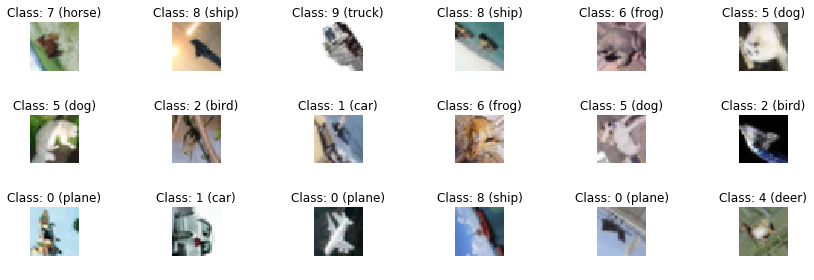

In [57]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/models/model/ for how to use model.fit_generator instead of model.fit for training

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

**Question 25: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?**

It would be slower, because it would take more epochs to obtain a high train accuracy. On-the-fly augmentation would show different images during every epoch compared to without augmentation where you show the same images over and over, and thus it with augmentation it takes longer to train.

**Question 26: What other types of image augmentation can be applied, compared to what we use here?**


There are other augmentations such as, samplewise_std_normaliztion, zoom_range, brightness_range, width/height_shift, rescale, etc


In [59]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain.shape[1:4]

# Build model (your best config)
model6 = model5

validation_split=0.2
    
# Train the model using on the fly augmentation
history65 = model6.fit_generator( train_flow, validation_data=(Xval,Yval), 
                                steps_per_epoch=len(Xtrain)*(1 - validation_split)/batch_size,
                                epochs=epochs,
                                validation_steps=len(Xtrain)*validation_split/batch_size)

ValueError: Error when checking target: expected dense_16 to have shape (10,) but got array with shape (1,)

In [288]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, converted_Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, converted_Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 0.2625
Test accuracy: 0.8998
Test loss: 0.3878
Test accuracy: 0.8886


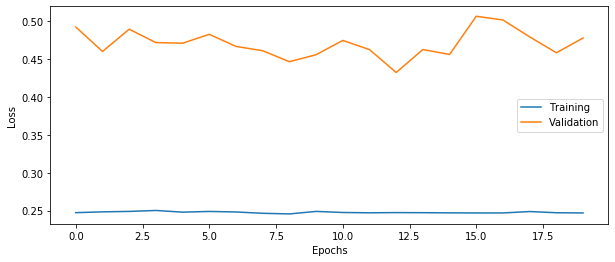

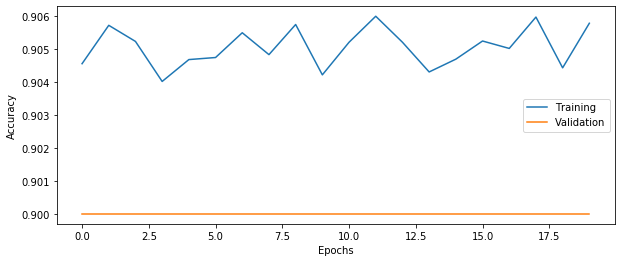

In [291]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly

In [292]:
# Find misclassified images
y_pred = model6.predict_classes(Xtest)
y_correct = np.argmax(Ytest,axis=1)

miss = np.flatnonzero(y_correct != y_pred)

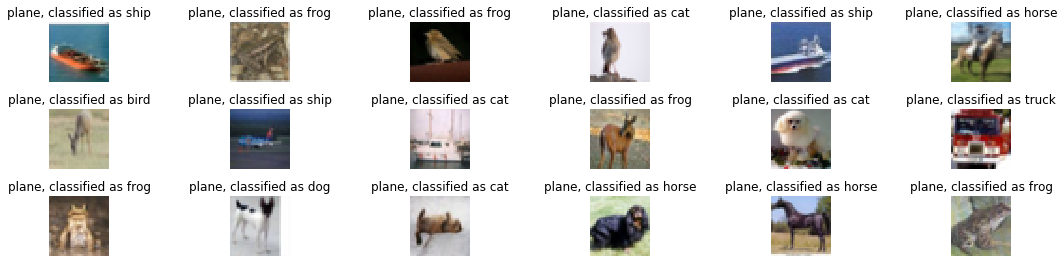

In [294]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

**Question 27: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?**

Yes, convolutional layers can be applied to images of any size, but the dense layers expect a certain input size.


Question 28: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?
Either scale the images beforehand, or making the network fully-convolutional.

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database. Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 29: How many convolutional layers does ResNet50 have? 
ResNet50 has 53 convolutional layers.

Question 30: How many trainable parameters does the ResNet50 network have? 
25,583,592 trainable parameters.

Question 31: What is the size of the images that ResNet50 expects as input?
224 by 224 pixels image.

Question 32: Using the answer to question 30, explain why the second derivative is seldom used when training deep networks.
This is because the second derivative would be a hessian matrix of 25 million by 25 million, which is hard to compute and store

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/applications/#resnet

Useful functions

`image.load_img` in keras.preprocessing

`image.img_to_array` in keras.preprocessing

`ResNet50` in keras.applications.resnet50

`preprocess_input` in keras.applications.resnet50

`decode_predictions` in keras.applications.resnet50

`expand_dims` in numpy


In [70]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice
from keras.applications.resnet import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

resmodel= ResNet50(
     input_shape = (224, 224, 3)
)

resmodel.summary()

img_path = 'elephant.jpg'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = resmodel.predict(x)

print("Predicted:", decode_predictions(preds, top=3)[0])

'''
We're pretty sure the code is correct, yet we keep getting:
FileNotFoundError: [Errno 2] No such file or directory: 'elephant.jpg'
we tried several images, but none of them worked
'''

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

FileNotFoundError: [Errno 2] No such file or directory: 'elephant.jpg'